In [1]:
import pandas as pd
import numpy as np
import json

def matrix_creator():
    # Board's index
    index = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
    # Two dicts for later use
    d = {}
    d2 = {}

    # The outer dict is for the indexes and the inner for the columns
    for i in index:
        for j in range(1, len(index) + 1):
            # I fill it with '~'
            d2[j] = '~'
        d[i] = d2

    # Dataframe out of the dicts
    df = pd.DataFrame(d)
    # Transpose it to have the letters to be the index and the numbers the columns
    df = df.T
    return df

In [2]:
# Para guardar la matrix como json

df.to_json('json/json_test1.json', orient = 'records', indent = 4)
df.to_json('json/json_test2.json', orient = 'records', indent = 4)
df.to_json('json/json_test3.json', orient = 'records', indent = 4)

NameError: name 'df' is not defined

In [4]:
# Para guardar el juego de hundir la flota, tendría que guardar 4 matrices: back y front de cada jugador

In [5]:
# Para leer la info del json

with open('json/json_test.json', 'r+') as outfile:
    old_game = json.load(outfile)

print(old_game)
print('-' * 100)
old_df = pd.DataFrame(old_game)
print(old_df)

[{'1': '~', '2': '~', '3': '~', '4': '~', '5': '~', '6': '~', '7': '~', '8': '~', '9': '~', '10': '~'}, {'1': '~', '2': '~', '3': '~', '4': '~', '5': '~', '6': '~', '7': '~', '8': '~', '9': '~', '10': '~'}, {'1': '~', '2': '~', '3': '~', '4': '~', '5': '~', '6': '~', '7': '~', '8': '~', '9': '~', '10': '~'}, {'1': '~', '2': '~', '3': '~', '4': '~', '5': '~', '6': '~', '7': '~', '8': '~', '9': '~', '10': '~'}, {'1': '~', '2': '~', '3': '~', '4': '~', '5': '~', '6': '~', '7': '~', '8': '~', '9': '~', '10': '~'}, {'1': '~', '2': '~', '3': '~', '4': '~', '5': '~', '6': '~', '7': '~', '8': '~', '9': '~', '10': '~'}, {'1': '~', '2': '~', '3': '~', '4': '~', '5': '~', '6': '~', '7': '~', '8': '~', '9': '~', '10': '~'}, {'1': '~', '2': '~', '3': '~', '4': '~', '5': '~', '6': '~', '7': '~', '8': '~', '9': '~', '10': '~'}, {'1': '~', '2': '~', '3': '~', '4': '~', '5': '~', '6': '~', '7': '~', '8': '~', '9': '~', '10': '~'}, {'1': '~', '2': '~', '3': '~', '4': '~', '5': '~', '6': '~', '7': '~', '

In [6]:
def load_old_game(file):
    with open(file, 'r+') as outfile:
        old_game = json.load(outfile)
        old_df = pd.DataFrame(old_game)
        return old_df

In [7]:
load_old_game('json/json_test.json')

,1,2,3,4,5,6,7,8,9,10
0,~,~,~,~,~,~,~,~,~,~
1,~,~,~,~,~,~,~,~,~,~
2,~,~,~,~,~,~,~,~,~,~
3,~,~,~,~,~,~,~,~,~,~
4,~,~,~,~,~,~,~,~,~,~
5,~,~,~,~,~,~,~,~,~,~
6,~,~,~,~,~,~,~,~,~,~
7,~,~,~,~,~,~,~,~,~,~
8,~,~,~,~,~,~,~,~,~,~
9,~,~,~,~,~,~,~,~,~,~


Con los jsons tendría que:
- Guardar 4 jsons -> 1 por dataframe
- Guardar los jsons en una misma carpeta
- Que al guardar, el nombre de cada archivo contenga: partida + player + matriz


Al volver a cargarlos:
- Debe asignar cada archivo a su correspondiente matriz-jugador

# Game dynamic

In [8]:
beginning = input('Do you want to start a new game(new) or continue an old one(old)?').lower()

if beginning == 'old':
    try:
        old_game_folder = input('Please enter the folder (or folder) with your old game: ')
        print(load_old_game_2(old_game_folder))
    except Exception:
        print("Seems like the folder/path doesn't exist or it's incorrect")
else:
    print('new game')
    # rest of the game

new game


In [9]:
import os
for i in os.listdir('json'):
    print(i)

json_test3.json
json_test.json
json_test2.json
json_test1.json


In [10]:
def load_old_game_2(path):
    # Dict to store all the dataframes that I upload with the names as keys, so that I can them match them with the respective player front/back boards
    dfs = {}

    # As I will have 4 json (1 per player front/back matrix)
    # I check all the items in the folder
    for i in os.listdir(path):
        # I append the name to the path, so that I can read it later
        full_path = path + '/' + str(i)
        # I read it
        with open(full_path, 'r+') as outfile:
            # Now I have the dict
            old_game = json.load(outfile)
            # Not I have the df
            old_df = pd.DataFrame(old_game)
            # I append the df, with the corresponding name, to the dict
            dfs[i] = old_df

    return dfs

In [11]:
load_old_game_2('json')

{'json_test3.json':    1  2  3  4  5  6  7  8  9 10
 0  ~  ~  ~  ~  ~  ~  ~  ~  ~  ~
 1  ~  ~  ~  ~  ~  ~  ~  ~  ~  ~
 2  ~  ~  ~  ~  ~  ~  ~  ~  ~  ~
 3  ~  ~  ~  ~  ~  ~  ~  ~  ~  ~
 4  ~  ~  ~  ~  ~  ~  ~  ~  ~  ~
 5  ~  ~  ~  ~  ~  ~  ~  ~  ~  ~
 6  ~  ~  ~  ~  ~  ~  ~  ~  ~  ~
 7  ~  ~  ~  ~  ~  ~  ~  ~  ~  ~
 8  ~  ~  ~  ~  ~  ~  ~  ~  ~  ~
 9  ~  ~  ~  ~  ~  ~  ~  ~  ~  ~,
 'json_test.json':    1  2  3  4  5  6  7  8  9 10
 0  ~  ~  ~  ~  ~  ~  ~  ~  ~  ~
 1  ~  ~  ~  ~  ~  ~  ~  ~  ~  ~
 2  ~  ~  ~  ~  ~  ~  ~  ~  ~  ~
 3  ~  ~  ~  ~  ~  ~  ~  ~  ~  ~
 4  ~  ~  ~  ~  ~  ~  ~  ~  ~  ~
 5  ~  ~  ~  ~  ~  ~  ~  ~  ~  ~
 6  ~  ~  ~  ~  ~  ~  ~  ~  ~  ~
 7  ~  ~  ~  ~  ~  ~  ~  ~  ~  ~
 8  ~  ~  ~  ~  ~  ~  ~  ~  ~  ~
 9  ~  ~  ~  ~  ~  ~  ~  ~  ~  ~,
 'json_test2.json':    1  2  3  4  5  6  7  8  9 10
 0  ~  ~  ~  ~  ~  ~  ~  ~  ~  ~
 1  ~  ~  ~  ~  ~  ~  ~  ~  ~  ~
 2  ~  ~  ~  ~  ~  ~  ~  ~  ~  ~
 3  ~  ~  ~  ~  ~  ~  ~  ~  ~  ~
 4  ~  ~  ~  ~  ~  ~  ~  ~  ~  ~
 5  ~  ~  ~  ~  ~ 

In [13]:
from varname import nameof

new_variable = 123
name = nameof(new_variable)
name

'new_variable'

In [15]:
df = matrix_creator()
df

,1,2,3,4,5,6,7,8,9,10
A,~,~,~,~,~,~,~,~,~,~
B,~,~,~,~,~,~,~,~,~,~
C,~,~,~,~,~,~,~,~,~,~
D,~,~,~,~,~,~,~,~,~,~
E,~,~,~,~,~,~,~,~,~,~
F,~,~,~,~,~,~,~,~,~,~
G,~,~,~,~,~,~,~,~,~,~
H,~,~,~,~,~,~,~,~,~,~
I,~,~,~,~,~,~,~,~,~,~
J,~,~,~,~,~,~,~,~,~,~


In [48]:
for i in df.loc['B':'D'].values:
   i[3:7] = 'X'

df

,1,2,3,4,5,6,7,8,9,10
A,~,~,~,~,~,~,~,~,~,~
B,~,~,~,X,X,X,X,~,~,~
C,~,~,~,X,X,X,X,~,~,~
D,~,~,~,X,X,X,X,~,~,~
E,~,~,~,X,~,~,~,~,~,~
F,~,~,~,~,~,~,~,~,~,~
G,~,~,~,~,~,~,~,~,~,~
H,~,~,~,~,~,~,~,~,~,~
I,~,~,~,~,~,~,~,~,~,~
J,~,~,~,~,~,~,~,~,~,~


# To save the game

In [53]:
df1 = matrix_creator()
df2 = matrix_creator()
df3 = matrix_creator()
df4 = matrix_creator()

for i in df1.loc['B':'D'].values:
   i[3:7] = 'X'

path1 = 'json/' + nameof(df1) + '.json'
path2 = 'json/' + nameof(df2) + '.json'
path3 = 'json/' + nameof(df3) + '.json'
path4 = 'json/' + nameof(df4) + '.json'

df1.to_json(path1, orient = 'records', indent = 4)
df2.to_json(path2, orient = 'records', indent = 4)
df3.to_json(path3, orient = 'records', indent = 4)
df4.to_json(path4, orient = 'records', indent = 4)

In [2]:
# game_name = input('How do you want to save the game?')

def save_game(dfs_list, game_name):
    df1, df2, df3, df4 = dfs_list

    path1 = 'json/' + nameof(df1) + '.json'
    path2 = 'json/' + nameof(df2) + '.json'
    path3 = 'json/' + nameof(df3) + '.json'
    path4 = 'json/' + nameof(df4) + '.json'

    df1.to_json(path1, orient = 'records', indent = 4)
    df2.to_json(path2, orient = 'records', indent = 4)
    df3.to_json(path3, orient = 'records', indent = 4)
    df4.to_json(path4, orient = 'records', indent = 4)

    return 'Succesfully saved'

In [59]:
t1, t2, t3, t4 = matrix_creator(), matrix_creator(), matrix_creator(), matrix_creator()
l = [t1, t2, t3, t4]
save_game(l)

'Succesfully saved'

In [1]:
import os
if not os.path.exists('my_folder'):
    os.makedirs('my_folder')

In [3]:
from varname import nameof

def save_game(dfs_list, game_name):
    # I unpack the dfs in the list
    player1_front, player1_back, player2_front, player2_back = dfs_list

    os.makedirs('json/' + game_name)
    # I append the names to the locations
    path1 = 'json/' + game_name + '/' + nameof(player1_front) + '.json'
    path2 = 'json/' + game_name + '/' + nameof(player1_back) + '.json'
    path3 = 'json/' + game_name + '/' + nameof(player2_front) + '.json'
    path4 = 'json/' + game_name + '/' + nameof(player2_back) + '.json'

    player1_front.to_json(path1, orient = 'records', indent = 4)
    player1_back.to_json(path2, orient = 'records', indent = 4)
    player2_front.to_json(path3, orient = 'records', indent = 4)
    player2_back.to_json(path4, orient = 'records', indent = 4)

    return 'Succesfully saved'

In [4]:
t1, t2, t3, t4 = matrix_creator(), matrix_creator(), matrix_creator(), matrix_creator()
l = [t1, t2, t3, t4]
save_game(l, 'test2')

'Succesfully saved'

In [2]:
def load_old_game(game_name):
    # Dict to store all the dataframes that I upload with the names as keys, so that I can them match them with the respective player front/back boards
    dfs = {}
    path = 'json/' + game_name

    # As I will have 4 json (1 per player front/back matrix)
    # I check all the items in the folder
    for i in os.listdir(path):
        # I append the name to the path, so that I can read it later
        full_path = path + '/' + str(i)
        # I read it
        with open(full_path, 'r+') as outfile:
            # Now I have the dict
            old_game = json.load(outfile)
            # Not I have the df
            old_df = pd.DataFrame(old_game)
            # I append the df, with the corresponding name, to the dict
            dfs[i] = old_df

    return dfs

In [11]:
def load_old_game(game_name):
    # Dict to store all the dataframes that I upload with the names as keys, so that I can them match them with the respective player front/back boards
    dfs = []
    path = 'json/' + game_name

    # As I will have 4 json (1 per player front/back matrix)
    # I check all the items in the folder
    for i in os.listdir(path):
        # I append the name to the path, so that I can read it later
        full_path = path + '/' + str(i)
        # I read it
        with open(full_path, 'r+') as outfile:
            # Now I have the dict
            old_game = json.load(outfile)
            # Not I have the df
            old_df = pd.DataFrame(old_game)

            # I recover the indexes, as they get lost when saved as jsons
            old_df.index = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
            old_df.columns = list(range(1, 11))
            
            # I append the df, with the corresponding name, to the dict
            dfs.append(old_df)

    return dfs

In [13]:
dfs = load_old_game('second_attempt')
dfs[0][1]

A    X
B    ~
C    ~
D    ~
E    ~
F    ~
G    ~
H    ~
I    ~
J    ~
Name: 1, dtype: object

In [28]:
dfs = load_old_game('test')
x = []

for k, v in dfs.items():
    x.append(k)

x

['player2_front.json',
 'player1_back.json',
 'player2_back.json',
 'player1_front.json']

In [12]:
t1, t2, t3, t4 = matrix_creator(), matrix_creator(), matrix_creator(), matrix_creator()
l = [t1, t2, t3, t4]

In [14]:
t2.loc['A', 0:] = '*'
t2.loc['B', 0:] = '*'
t2.loc['C', 2:8] = '*'
t3.loc['A', 0:] = '*'
t3.loc['B', 0:] = '*'
t3.loc['C', 2:8] = '*'

In [17]:
t3

,1,2,3,4,5,6,7,8,9,10
A,*,*,*,*,*,*,*,*,*,*
B,*,*,*,*,*,*,*,*,*,*
C,~,*,*,*,*,*,*,*,~,~
D,~,~,~,~,~,~,~,~,~,~
E,~,~,~,~,~,~,~,~,~,~
F,~,~,~,~,~,~,~,~,~,~
G,~,~,~,~,~,~,~,~,~,~
H,~,~,~,~,~,~,~,~,~,~
I,~,~,~,~,~,~,~,~,~,~
J,~,~,~,~,~,~,~,~,~,~


In [18]:
save_game(l, 'test4')

'Succesfully saved'

In [31]:
a, b, c, d = load_old_game('second_attempt').values()

In [42]:
d['1']

0    ~
1    ~
2    ~
3    ~
4    ~
5    ~
6    ~
7    O
8    ~
9    ~
Name: 1, dtype: object

In [43]:
test = matrix_creator()
test

,1,2,3,4,5,6,7,8,9,10
A,~,~,~,~,~,~,~,~,~,~
B,~,~,~,~,~,~,~,~,~,~
C,~,~,~,~,~,~,~,~,~,~
D,~,~,~,~,~,~,~,~,~,~
E,~,~,~,~,~,~,~,~,~,~
F,~,~,~,~,~,~,~,~,~,~
G,~,~,~,~,~,~,~,~,~,~
H,~,~,~,~,~,~,~,~,~,~
I,~,~,~,~,~,~,~,~,~,~
J,~,~,~,~,~,~,~,~,~,~


In [45]:
list(range(1, 11))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
# Print the boards'
# For that I store player's 1 back matrix in 'result'
result = player1_board.matrix_back

# I create a divisor, as I want to print both boards together
divisor = ['|' for i in range(10)]
index = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
divisor_df = pd.DataFrame(divisor, index = index, columns = ['|'])

# I join the divisor to player's 1 board and then player's 2 board
result = pd.merge(result, divisor_df, how = 'outer', right_index = True, left_index = True)
result = pd.merge(result, player2_board.matrix_back, how = 'outer', right_index = True, left_index = True)

# I print the result of the game
print('\n', result)

In [4]:
df1 = matrix_creator()
df2 = matrix_creator()

In [5]:
result = df1

# I create a divisor, as I want to print both boards together
divisor = ['|' for i in range(10)]
index = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
divisor_df = pd.DataFrame(divisor, index = index, columns = ['|'])

# I join the divisor to player's 1 board and then player's 2 board
result = pd.merge(result, divisor_df, how = 'outer', right_index = True, left_index = True)
result = pd.merge(result, df2, how = 'outer', right_index = True, left_index = True)

# I print the result of the game
print('\n', result)


   1_x 2_x 3_x 4_x 5_x 6_x 7_x 8_x 9_x 10_x  ... 1_y 2_y 3_y 4_y 5_y 6_y 7_y  \
A   ~   ~   ~   ~   ~   ~   ~   ~   ~    ~  ...   ~   ~   ~   ~   ~   ~   ~   
B   ~   ~   ~   ~   ~   ~   ~   ~   ~    ~  ...   ~   ~   ~   ~   ~   ~   ~   
C   ~   ~   ~   ~   ~   ~   ~   ~   ~    ~  ...   ~   ~   ~   ~   ~   ~   ~   
D   ~   ~   ~   ~   ~   ~   ~   ~   ~    ~  ...   ~   ~   ~   ~   ~   ~   ~   
E   ~   ~   ~   ~   ~   ~   ~   ~   ~    ~  ...   ~   ~   ~   ~   ~   ~   ~   
F   ~   ~   ~   ~   ~   ~   ~   ~   ~    ~  ...   ~   ~   ~   ~   ~   ~   ~   
G   ~   ~   ~   ~   ~   ~   ~   ~   ~    ~  ...   ~   ~   ~   ~   ~   ~   ~   
H   ~   ~   ~   ~   ~   ~   ~   ~   ~    ~  ...   ~   ~   ~   ~   ~   ~   ~   
I   ~   ~   ~   ~   ~   ~   ~   ~   ~    ~  ...   ~   ~   ~   ~   ~   ~   ~   
J   ~   ~   ~   ~   ~   ~   ~   ~   ~    ~  ...   ~   ~   ~   ~   ~   ~   ~   

  8_y 9_y 10_y  
A   ~   ~    ~  
B   ~   ~    ~  
C   ~   ~    ~  
D   ~   ~    ~  
E   ~   ~    ~  
F   ~   ~    ~  
G   ~   ~

In [30]:
df = matrix_creator()
df[:] = 1
df.loc["A":"C", 10] = 0
df.loc["A":"C", 4] = -1
df = df.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, A to J
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       10 non-null     int64
 1   2       10 non-null     int64
 2   3       10 non-null     int64
 3   4       10 non-null     int64
 4   5       10 non-null     int64
 5   6       10 non-null     int64
 6   7       10 non-null     int64
 7   8       10 non-null     int64
 8   9       10 non-null     int64
 9   10      10 non-null     int64
dtypes: int64(10)
memory usage: 1.2+ KB


<AxesSubplot:>

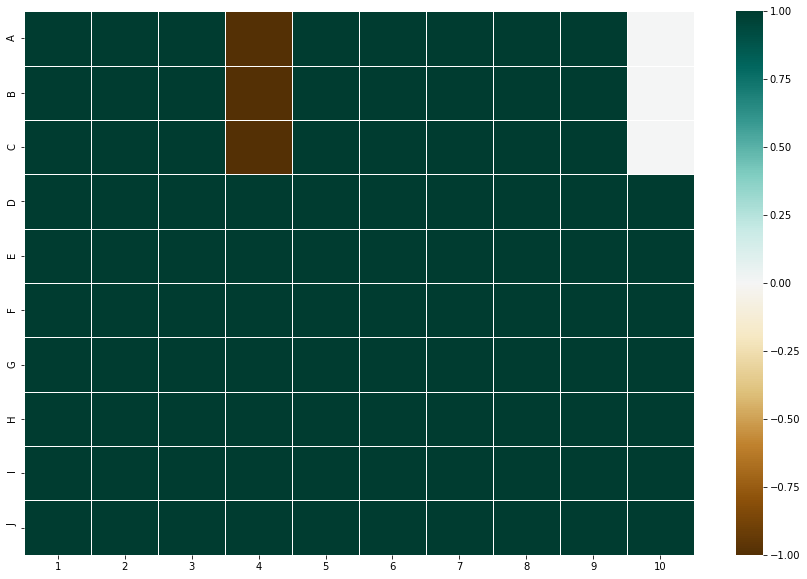

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))
sns.heatmap(df, cmap="BrBG", linewidths = 0.5, linecolor = "white")